#### Introduction to Statistical Learning with Python: Chapter 9 

#### Support Vector Machines

##### SVM, an approach for classification was developed in the computer science community in the 1990s and have grown in popularity since then.
##### The support vector machine is a geberalization of a simple and intuitive classifier called the maximal margin classifier.

##### ***Maximal Margin Classifier***
##### ***Hyperplane***: in a p-dimensional space, a hyperplane is a flat affine subspace of dimension ***p - 1***. The mathematical definition of a hyperplane is quite simple, in two dimensions, a hyperplane is defined be the equation ***b0 + b1X1 + b2X2 = 0*** (eqn 1). 
##### This equation can be extended to the p-dimensional setting: ***b0 + b1X1 + b2X2 +...+ bpXp =0*** (eqn 2) The equation defines a p-dimensional hyperplane, in the sense that if a point ***X=(X1, X2...,Xp)T*** (eqn 3) in p-dimensional space satisfies then X lies on the hyperplane.
##### Now suppose that X does not satisfy eqn 2, rather, ***b0 + b1X1 + b2X2 +...+bpXp>0*** - This tells us that X lies to one side of the hyperplane, on the other hand if ***b0 + b1X1 + b2X2 +...+bpXp<0***, then X lies on the other side of the hyperplane. So we can think of the hyperplane as dividing p-dimensional space into two halves.
##### In general, if our data can be perfectly separated using a hyperplane, then there will in fact exist an infinite number of such hyperplanes. Therefore a natural choice is the ***maximal margin hyperplane***, which is the separating hyperplane that is farthest from the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies.
##### The maximal margin classifier is a very natural way to perform classification, if a separating hyperplane exists. However, in cases where there is no separating hyperplane and no maximal margin classifier then the concept of a separating hyperplane can be extended to develop a hyperplane that almost separates the classes using ***soft margin***.

##### ***Support Vector Classifiers***
##### The generalization of the maximal margin classifier to the non-separable case is known as the support vector classifier.
##### The soft margin classifier/ SVC-- rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin / hyperplane.
##### The hyperplane is chosen to correctly separate most of the training observations into two classes, but may misclassify a few observations. It is the solution to the optimization problem.
##### **Support vectors** are observations that lie directly on the margin or on the wrong side of the margin for their class. These observations do affect the support vector classifier.

##### ***Support Vector Machines***
##### The support vector classifier is a natural approach for classification in the two-class setting, if the boundary between the two classes is linear. However, in practice we are sometimes faced with non-linear class boundaries.
##### The SVM is an extension of the SVC that results from enlarging the feature space in a specific way using kernels.
##### ***Kernel*** is a function that quantifies the similarity of two observations. 
##### ***Linear kernel***- the support vector classifier is linear in the features: which quantifies the similarity of a pair of observations using Pearson correlation.
##### ***Polynomial kernel*** allows the classifier to learn non-linear decision boundaries by implicitly mapping the input data into a higher-dimensional feature space.
##### ***Radial kernel*** usually called the Radial Basis Function kernel creates very flexible, non-linear boundaries. Finds a decision boundary that can bend around clusters of data points.


In [2]:
!pip install numpy pandas matplotlib statsmodels

In [3]:
! pip install ISLP

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [5]:
# We will use the function RocCurveDisplay.from_estimator() to produce several ROC plots, using shorthand roc_curve
roc_curve = RocCurveDisplay.from_estimator

#### Support Vector Classifier
##### We now use the ***SupportVectorClassifier()*** (SVC) from sklearn to fit the support vector classifier for a given value of the parameter ***C***. The ***C*** argument allows us to specify the cost of a violation to the margin. When the **cost** argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the **C** argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.
##### Here we demonstrate the use of **SVC()** on a two-dimensional example, so that we can plot the resulting decision boundary. We begin by generating the observations, which belong to two classes, and checking whether the classes are linearly separable.

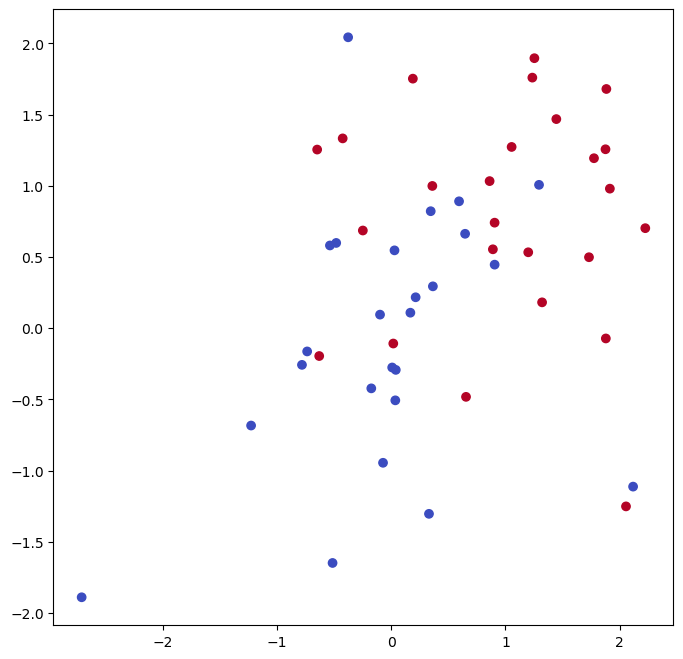

In [6]:
rng = np.random.default_rng(1) #creates a Numpy random generator with a fixed seed 1 for reproducibility
X = rng.standard_normal((50,2)) #an array of 50 rows(samples), and 2 columns(features). Each entry comes from the standard normal distribution(mean 0, variance 1)
y = np.array([-1] * 25 + [1] * 25) # list of 25 values all -1, and 25 values all 1.concatenating gives list of length 50
X[y==1] +=1 # y==1 selects the rows of X that belong to class +1. +=1, shifts both features of those points by +1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], #first column(x-axis)
          X[:,1], #second column(y-axis)
          c=y,
          cmap= cm.coolwarm)

In [7]:
#They are not. We now fit the classifier
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X,y)

,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


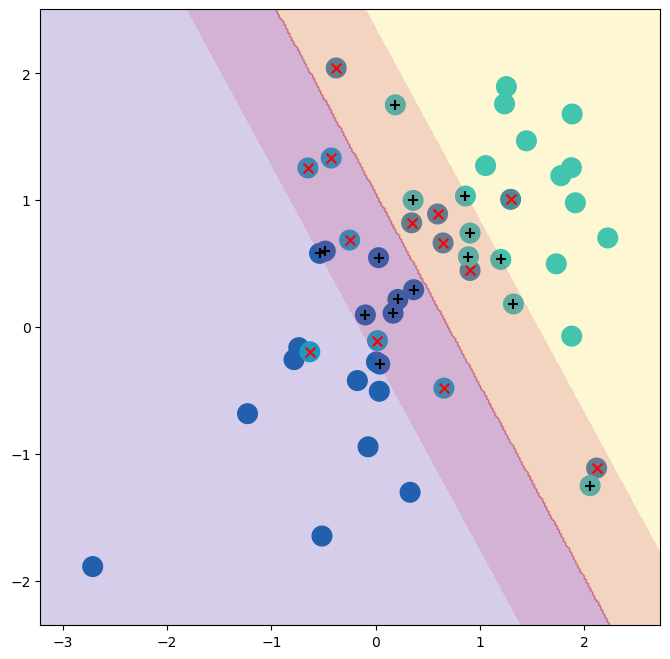

In [8]:
#The support vector classifier with two features can be visualized by plotting values of its decision function
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_linear, ax=ax)

#The decision boundary between the two classes is linear(kernel="linear"). The support vectors are marked with + and the remaining observations are plotted as circles.

##### Lets instead use a smaller value of the cost parameter.

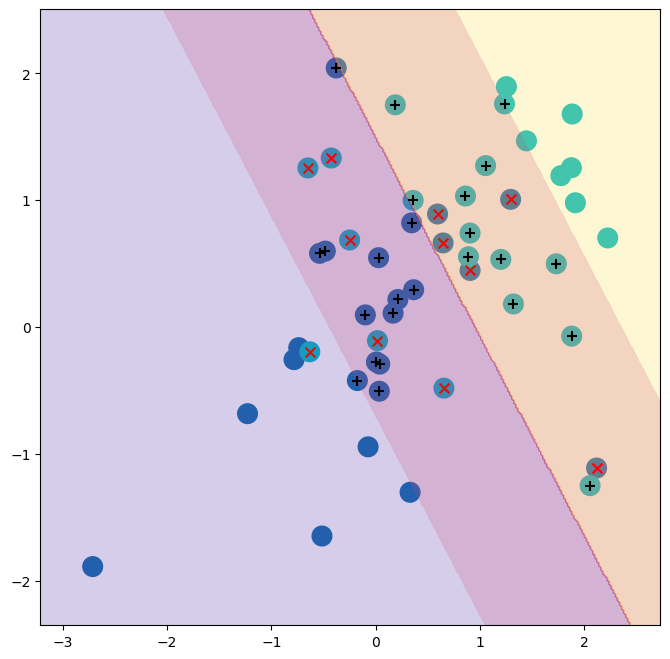

In [9]:
svm_linear_small = SVC(C=0.1, kernel="linear")
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_linear_small, ax=ax)

##### From the figure above, with a smaller value of the cost parameter, we obtain a larger number of support vectors, because the margin is now wider.

In [10]:
#For linear kernels, we can extract the coefficients of linear decision boundary as follows
svm_linear.coef_

array([[1.17303943, 0.77348227]])

##### Since the SVM is an estimator in sklearn, we can use the usual machinery to tune it.

In [11]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                       {"C":[0.001,0.01,0.1,1,5,10,100]},
                       refit=True,
                       cv=kfold,
                       scoring="accuracy")
grid.fit(X,y)
grid.best_params_

{'C': 1}

##### We can easily access the cross-validation errors for each of these models in grid.cv_results_. This prints out a lot of detail, so we extract the accuracy results only.

In [12]:
grid.cv_results_[("mean_test_score")]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

##### We see that **C=1** results in the highest cross-validation accuracy of 0.74, though the accuracy is the same for several values of **C**. The classifier **grid.best_estimator_** can be used to predict the class label on a set of test observations.

In [13]:
#Lets generate the test data set
X_test = rng.standard_normal((20,2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test==1] +=1

##### Now we predict the class labels of these test observations. Here we use the best model selected by cross-validation in order to make predictions.

In [14]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

#With this value of C, 70% of the test observations are correctly classified.

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [15]:
# Use C=0.001
svm_ = SVC(C=0.001, kernel="linear").fit(X,y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

#In this case 60% of test observations are correctly classified.

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


##### We now consider a situation in which the two cases are linearly separable. Then we can find an optimal separating hyperplane using the SVC() estimator.
##### We first further separate the two classes in our simulated data so that they are linearly separable.

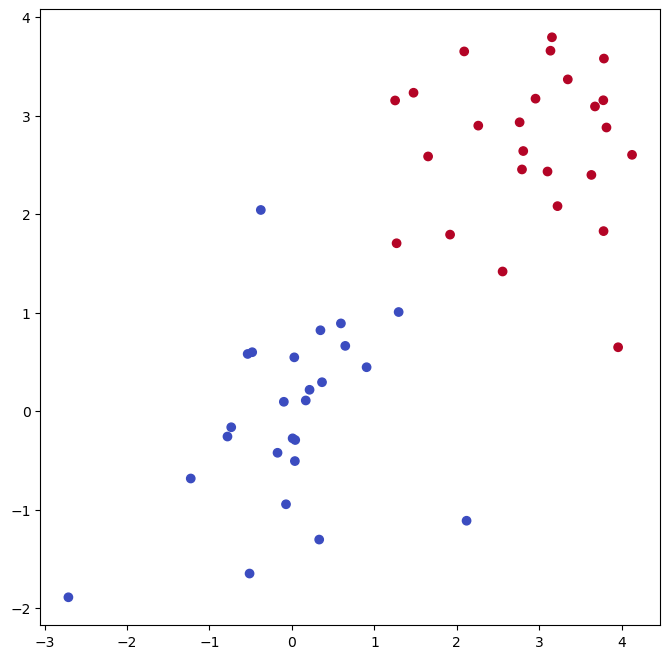

In [16]:
X[y==1] += 1.9
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

In [17]:
#Now the observations are just barely linearly separable
svm_ = SVC(C=1e5, kernel="linear").fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y_hat,y)
                    

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


##### We fit the support vector classifier and plot the resulting hyperplane, using a very large value of **C** so that no observations are misclassified.

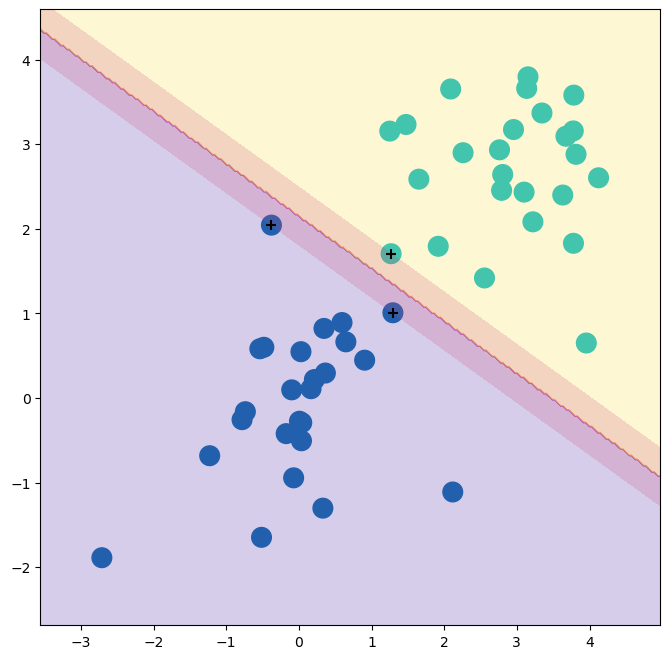

In [18]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_, ax=ax)

##### Indeed from the above, no training errors were made and only three support vectors were used. The large value of **C** also means that these three support points are on the margin and define it.

In [19]:
#Lets try with a smaller value of C
svm_ = SVC(C=0.1, kernel="linear").fit(X, y)
y_hat= svm_.predict(X)
confusion_table(y_hat, y)

# using C=0.1 again do not misclassify any training observations, but we also obtain a much wider margin and make use of twelve support vectors

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


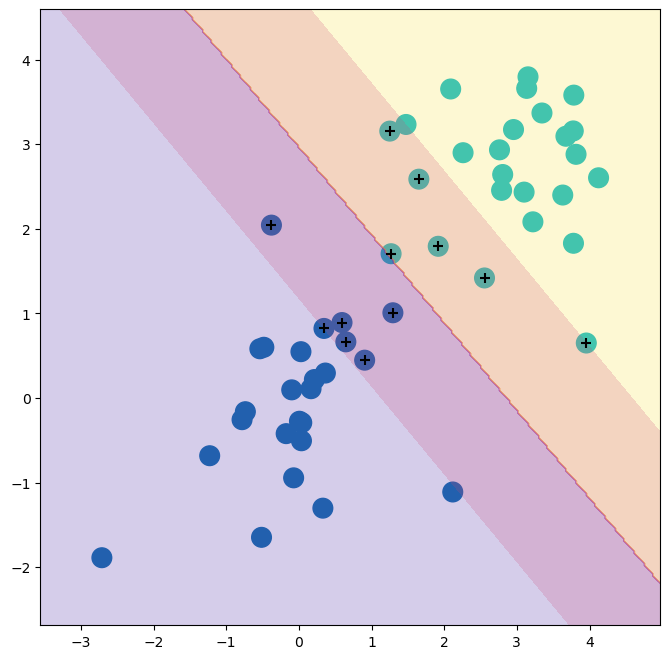

In [20]:
#Lets plot the above
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_, ax=ax)

#### Support Vector Machine
##### In order to fit an SVM using a non-linear kernel, we once again use the SVC() estimator and use a different value of the parameter **kernel**. To fit an SVM with a polynomial kernel we use **kernel="poly"** and to fit an SVM with a radial kernel we use **kernel="rbf"**. In the former case we also use the **degree** argument to specify a degree for the polynomial kernel and in the latter case we use **gamma** to specify a value of **γ** for the radial basis kernel.

In [21]:
X= rng.standard_normal((200, 2))# creates 200 samples each with 2 features drawn from the standard normal distribution:so initially points are centered near(0,0)
X[:100] += 2 #adds 2 to both feature values of the first 100 rows. points get shifted to be centered around(2,2)
X[100:150] -=2 # shifts next 50 samples down to be centered around(-2,-2)
y= np.array([1]*150 + [2]*50) #first 150 samples are given label 1 and last 50 samples givem label 2


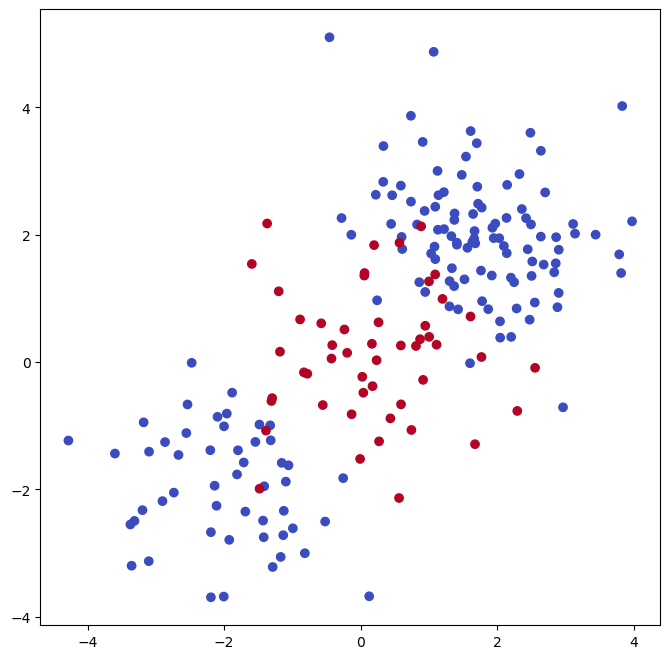

In [22]:
#Plot the data
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
          X[:,1],
          c=y,
          cmap=cm.coolwarm)

##### The data is randomly split into training and testing groups. We then fit the training data using the SVC() estimator with a radial kernel and γ=1

In [23]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(C=1, gamma=1, kernel="rbf")
svm_rbf.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


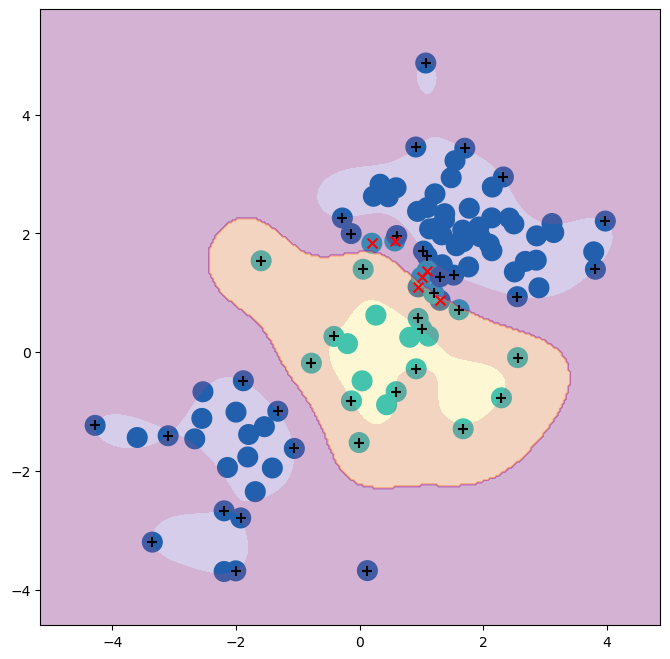

In [24]:
# plotting
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

##### We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of **C**, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

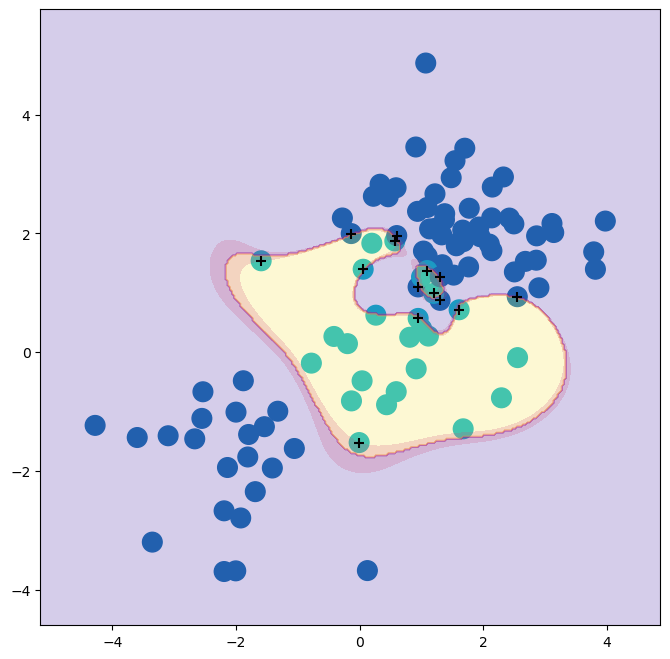

In [25]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

##### We can perform cross-validation using skm.GridSearchCV() to select the best choice of  **γ** and **C** for an SVM with a radial kernel.

In [26]:
kfold= skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                       {"C": [0.1,1,10,100,1000],
                       "gamma":[0.5,1,2,3,4]},
                       refit=True,
                       cv=kfold,
                       scoring="accuracy")
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

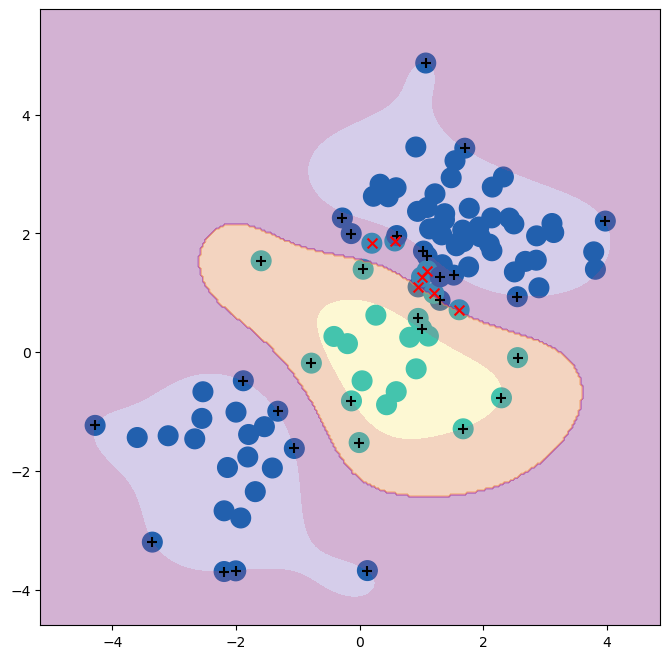

In [27]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, best_svm, ax=ax)

In [28]:
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

#With these parameters, 12% of test observations are misclassified by this SVM.

Truth,1,2
Predicted,,
1,69,6
2,6,19


#### ROC Curves

##### SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain **fitted values** for each observation, which are the numerical scores used to obtain the class labels. The sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: If the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero then it is assigned to the other.
##### By changing this threshold from zero to some positive value, we skew the classifications in favor of one class versus the other. By considering a range of these thresholds, positive and negative, we produce the ingredients for a ROC plot. We can access these values by calling the **decision_function()** method of the fitted SVM estimator.
##### The function ***ROCCurveDisplay.from_estimator()*** will produce a plot of a ROC curve. It takes a fitted estimator as its first argument, followed by a model matrix **X** and labels **y**. The argument **name** is used in the legend, while **color** is used for the color of the line. Results are plotted on our axis object **ax**.

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


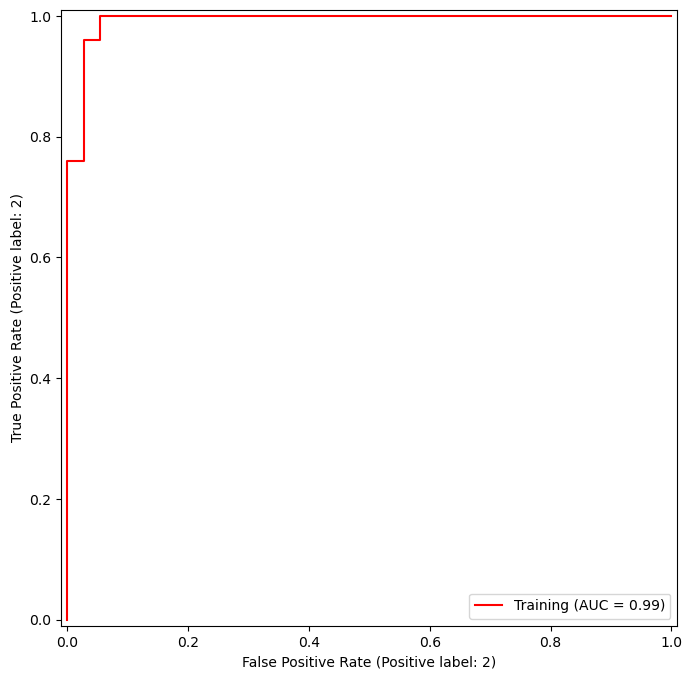

In [29]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
         X_train,
         y_train,
         name="Training",
         color="r",
         ax=ax)

In [30]:
best_svm.decision_function(X_train)

array([-5.40985590e-01,  3.62111255e-01, -1.68286861e+00, -1.13486998e+00,
       -1.26132555e+00, -9.99390580e-01, -1.32701595e+00, -1.16288760e+00,
        1.21253035e+00, -1.59862780e+00, -1.30006836e+00, -3.12589937e-02,
       -1.34823819e+00, -9.99795305e-01, -1.00034804e+00, -7.29211815e-02,
       -1.43155278e+00,  1.00028321e+00, -9.99846282e-01, -1.52072704e+00,
       -1.64805300e+00, -1.39830979e+00, -1.32349950e+00, -1.03567120e+00,
       -1.13498287e+00, -1.23025249e+00, -1.51806995e+00, -1.18156176e+00,
        1.35708269e+00, -8.13953799e-01,  1.39369950e-03, -1.45874697e+00,
       -1.07995722e+00, -1.42700926e+00,  1.49266986e+00,  9.99664197e-01,
        1.35578042e+00, -9.56248034e-01, -1.16642666e-01, -1.51906834e+00,
       -1.28917627e+00, -1.52025730e+00, -1.46270266e+00, -1.52565438e+00,
       -1.50984489e+00, -1.67659124e+00, -9.99942667e-01,  1.21153105e+00,
       -1.03278984e+00, -9.99975835e-01, -1.05190980e+00, -3.43035406e-01,
       -1.33677314e+00, -

##### In the above example, the SVM appears to provide accurate predictions. By increasing **γ** we can produce a more flexible fit and generate further improvements in accuracy.

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


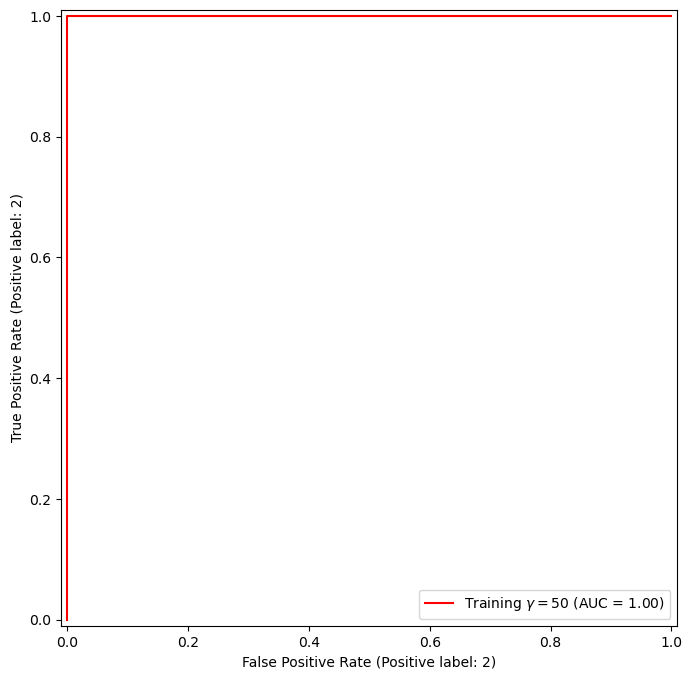

In [31]:
svm_flex = SVC(kernel="rbf", gamma=50, C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
         X_train,
         y_train,
         name= "Training $\gamma=50$",
         color="r",
         ax=ax)
              

##### However, these ROC curves are all on the training data. We are more interested in the level of prediction accuracy on the test data. When we compute the ROC curves on the test data, the model with **γ=0.5** appears to provide the most accurate results.

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


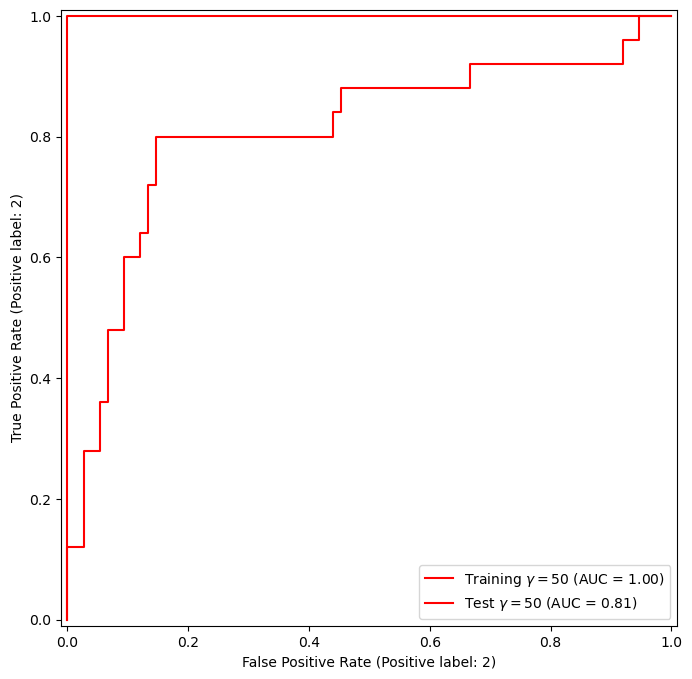

In [32]:
roc_curve(svm_flex, X_test, y_test, name= "Test $\gamma=50$", color="r", ax=ax)
fig

##### Lets look at our tuned SVM

C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
C:\Users\colli\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


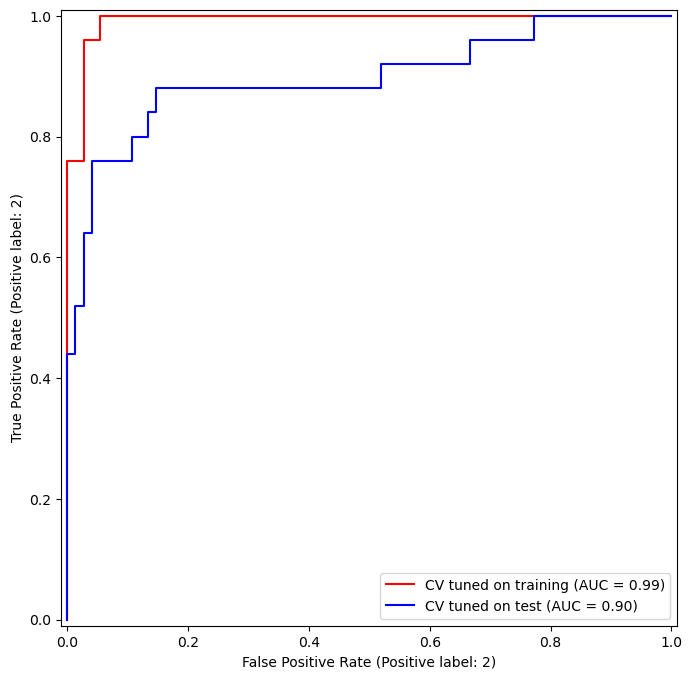

In [33]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip((X_train, X_test),
                          (y_train, y_test),
                          ("r", "b"),
                          ("CV tuned on training",
                          "CV tuned on test")):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

#### SVM with Multiple Classes

##### If the response is a factor containing more than two levels, then the SVC() function will perform multi-class classification using either one-versus-one approach(when**decision_function_shape=="ovo")** or one-versus-rest(when **decision_function=="ovr")**

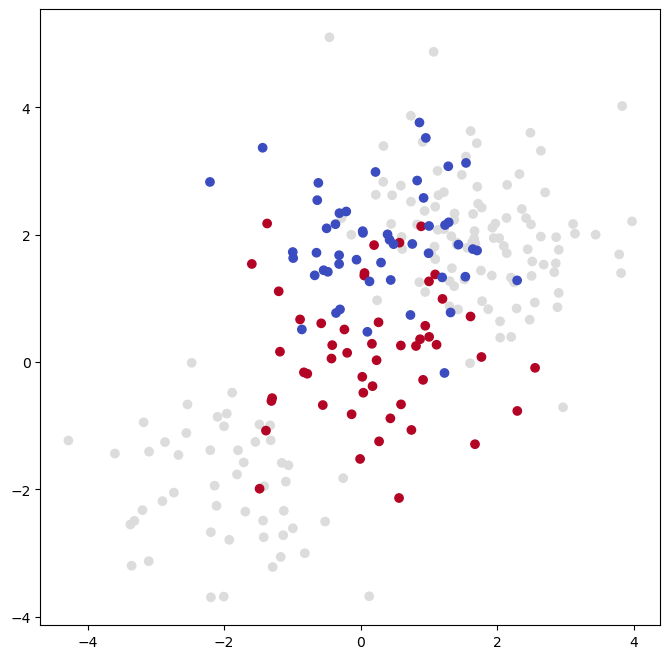

In [34]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y= np.hstack([y, [0] * 50])
X[y==0,1] +=2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

##### We now fit an SVM to the data.

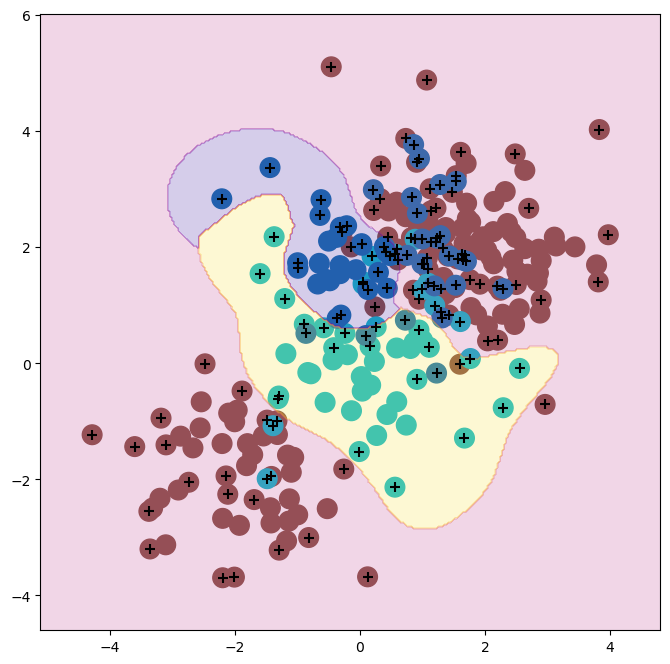

In [35]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape="ovo")
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y,svm_rbf_3, scatter_cmap=cm.tab10,ax=ax)

#The sklearn.svm library can also be used to perform support vector regression with a numerical response using the estimator SupportVectorRegression()

#### Application to Gene Expression Data

##### We now examine the **Khan** data set, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available.
##### The data set consists of training data, **xtrain** and **ytrain**, and testing data **xtest** and **ytest**.

In [36]:
Khan = load_data("Khan")
Khan["xtrain"].shape, Khan["xtest"].shape

((63, 2308), (20, 2308))

##### This data set consists of expression measurements for 2,308 genes. The training and test sets consists of 63 and 20 observations respectively.
##### We will use a support vector approach to predict cancer subtype using gene expression measurements. In this data set, there is a very large number of features relative to the number of observations. This suggests that we should use linear kernel, because the additional flexibility that will result from using a polynomial or radial kernel is unnecessary.

In [37]:
khan_linear = SVC(kernel="linear", C=10)
khan_linear.fit(Khan["xtrain"], Khan["ytrain"])
confusion_table(khan_linear.predict(Khan["xtrain"]), Khan["ytrain"])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


##### We see that there are no training errors. Its not surprising because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes.

##### We are more interested in the support vector classifier's performance on the test obseravtions.

In [38]:
confusion_table(khan_linear.predict(Khan["xtest"]), Khan["ytest"])

#We see that using C=10 yields two test set errors on these data.

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


#### Question 1

##### In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the **Auto** data set.

##### **(a)** Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [39]:
Auto = load_data("Auto")
mpg_median = np.median(Auto["mpg"])
Auto["mpg_cat"] = (Auto["mpg"] > mpg_median).astype(int)
Auto["mpg_cat"]


name
chevrolet chevelle malibu    0
buick skylark 320            0
plymouth satellite           0
amc rebel sst                0
ford torino                  0
                            ..
ford mustang gl              1
vw pickup                    1
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: mpg_cat, Length: 392, dtype: int32

##### **(b)** Fit a support vector classifier to the data with various values of **C**, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(Auto.drop(["mpg", "mpg_cat"], axis=1))
y= Auto["mpg_cat"]

#cross-validation setup
kfold = skm.KFold(5, random_state=0, shuffle=True)

#Pipeline: scale first then SVM
pipe_linear = Pipeline([("scaler", StandardScaler()),
                       ("svm", SVC(kernel="linear"))])
#parameter grid
param_grid = {"svm__C":[0.1,1,10,50,200,1000]}

#Grid search
grid_linear = skm.GridSearchCV(pipe_linear,
                              param_grid=param_grid,
                              cv=kfold,
                              refit=True,
                              scoring="accuracy")
grid_linear.fit(X,y)
# Results
print("Best parameters:", grid_linear.best_params_)
print("Best CV accuracy:", grid_linear.best_score_)
print("Best CV error:", 1 - grid_linear.best_score_) 

Best parameters: {'svm__C': 1}
Best CV accuracy: 0.91333982473223
Best CV error: 0.08666017526777003


##### **(c)** Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of **gamma** and **degree** and **C**. Comment on your results.

In [41]:

#Radial kernel (RBF)
pipe_rbf = Pipeline([("scaler", StandardScaler()),
                    ("svm", SVC(kernel="rbf"))])
param_grid_rbf = {
    "svm__C":[0.1,1,10,50,200,1000],
    "svm__gamma":[0.5, 1, 2, 3, 4]
}

grid_rbf = skm.GridSearchCV(pipe_rbf,
                           param_grid = param_grid_rbf,
                           cv=kfold,
                           refit=True,
                           scoring="accuracy")
grid_rbf.fit(X,y)
# Results
print("Best parameters:", grid_rbf.best_params_)
print("Best CV accuracy:", grid_rbf.best_score_)
print("Best CV error:", 1 - grid_rbf.best_score_)


Best parameters: {'svm__C': 1, 'svm__gamma': 1}
Best CV accuracy: 0.931223628691983
Best CV error: 0.06877637130801695


In [42]:
#Polynomial kernel

#Pipeline: scale first and then SVM
pipe_poly = Pipeline([("scaler", StandardScaler()),
                     ("svm", SVC(kernel="poly"))])
#parameter grid
param_grid_poly = {
    "svm__C":[0.1,1,10,50,200,1000],
    "svm__degree":[2,3,4,5],
    "svm__gamma":["scale", "auto"] # can also try numeric values
}
#Grid search
grid_poly = skm.GridSearchCV(pipe_poly,
                            param_grid= param_grid_poly,
                            cv=kfold,
                            scoring="accuracy",
                            refit=True)
grid_poly.fit(X,y)
# Results
print("Best parameters:", grid_poly.best_params_)
print("Best CV accuracy:", grid_poly.best_score_)
print("Best CV error:", 1 - grid_poly.best_score_)

Best parameters: {'svm__C': 10, 'svm__degree': 3, 'svm__gamma': 'scale'}
Best CV accuracy: 0.9209672184355728
Best CV error: 0.07903278156442717


#### Commenting on the results.
###### The linear model performs reasonably well, indicating that a linear separation between high and low mpg cars is fairly effective. However, both the radial basis and polynomial kernels achieve slightly lower cross-validation errors, showing that non-linear decision boundaries capture additional structure in the data.
###### Among the tested models, the radial kernel performs best suggesting that nonlinear interactions among features such as weight, horsepower and displacement play an important role in predicting fuel efficiency.

##### **(d)** Make some plots to back up your assertions in (b) and (c).

##### Since the Auto data set has many predictors(p>2), you can't directly plot the separating hyperplane in the full space. Instead, you visualize pairs of features at a time, fixing which two variables to plot, and using the fitted SVM decision function to draw boundaries.


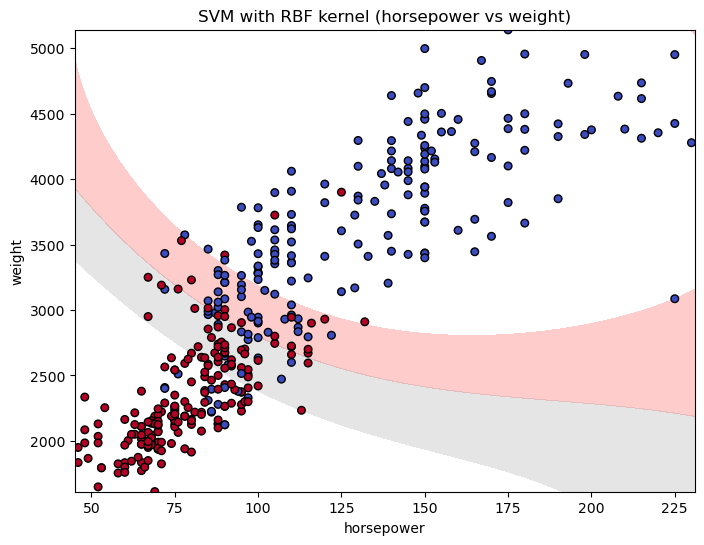

In [43]:
import matplotlib.pyplot as plt
## choose two predictors for visualization
features = ["horsepower", "weight"]
X_vis = Auto[features].values #2D feature matrix
y_vis= Auto["mpg_cat"]

#fit SVM with RBF kernel
pipe = Pipeline([("scaler", StandardScaler()),
                ("svm", SVC(kernel="rbf", C=10, gamma=0.1))])
pipe.fit(X_vis, y_vis)

#create grid for plotting decision function
x_min, x_max = X_vis[:,0].min() -1, X_vis[:,0].max() + 1 #min/max values of first feature
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1 #min/max values of the second feature

xx, yy= np.meshgrid(np.linspace(x_min, x_max, 200),
                   np.linspace(y_min, y_max, 200))

#predict decision boundary
Z = pipe.decision_function(np.c_[xx.ravel(), yy.ravel()]) #ravel() flattens a 2D array into 1D, np.c_ stacks the flattened x and y into column pairs
Z = Z.reshape(xx.shape)

#plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[-1,0,1], alpha=0.2, colors=["red","gray","blue"])
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap="coolwarm", s=30, edgecolors="k")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("SVM with RBF kernel ({} vs {})".format(*features))
plt.show()

#### Question 2

##### This problem involves **OJ** data set which is part of the ISLP package.
##### **(a)** Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations

In [44]:
OJ = load_data("OJ")
train_data = OJ.sample(n=800, random_state=1)
test_data=OJ.drop(train_data.index)
train_data.shape, test_data.shape

((800, 18), (270, 18))

##### **(b)** Fit a support vector classifier to the training data using **C=0.01**, with **Purchase** as the response and the other variables as predictors. How many support points are there?

In [45]:
X_train = pd.get_dummies(train_data.drop("Purchase", axis=1))
X_test = pd.get_dummies(test_data.drop("Purchase", axis=1))
y_train= train_data["Purchase"]
y_test = test_data["Purchase"]
#Linear SVC
svc = SVC(kernel="linear", C=0.01)
svc.fit(X_train, y_train)
#Number of support vectors
n_support = svc.n_support_.sum()
print("Number of support vectors:", n_support)
print("Support vectors per class:", svc.n_support_)

Number of support vectors: 625
Support vectors per class: [312 313]


##### **(c)** What are the training and test error rates

In [46]:
from sklearn.metrics import accuracy_score
# Predictions
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

#Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

#error rates
train_error = 1- train_accuracy
test_error = 1 - test_accuracy
print("Training error rate:", train_error)
print("Test error rate:", test_error)

Training error rate: 0.21750000000000003
Test error rate: 0.2222222222222222


##### **(d)** Use cross-validation to select an optimal **C**. Consider values in the range 0.01 to 10.

In [47]:
kfold = skm.KFold(n_splits=5, shuffle=True, random_state=1)
param_grid = {"C": np.logspace(-2,1,10)}
svc= SVC(kernel="linear")                              
#grid search
grid = skm.GridSearchCV(svc,
                       param_grid=param_grid,
                       cv=kfold,
                       scoring = "accuracy",
                       refit=True)
grid.fit(X_train, y_train)
# Results
print("Best C:", grid.best_params_["C"])
print("Best CV accuracy:", grid.best_score_)
print("Best CV error:", 1 - grid.best_score_)

Best C: 4.6415888336127775
Best CV accuracy: 0.8375
Best CV error: 0.16249999999999998


##### **(e)** Compute the training and test error rates using the new value for **C**

In [48]:
best_svc = grid.best_estimator_
train_error = 1 - best_svc.score(X_train, y_train)
test_error = 1 - best_svc.score(X_test, y_test)
print("Training error:", train_error)
print("Test error:", test_error)

Training error: 0.15749999999999997
Test error: 0.18518518518518523


##### **(f)** Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for **gamma**


In [49]:
#(b) Fit SVM with RBF kernel and C=0.01
svm_rbf = SVC(kernel="rbf", C=0.01, gamma="scale")  # default gamma = "scale"
svm_rbf.fit(X_train, y_train)

# (c) Support vectors
print("Number of support vectors:", len(svm_rbf.support_))

Number of support vectors: 638


In [50]:
# Training and test error
train_error = 1 - svm_rbf.score(X_train, y_train)
test_error = 1 - svm_rbf.score(X_test, y_test)
print("Training error (C=0.01):", train_error)
print("Test error (C=0.01):", test_error)

Training error (C=0.01): 0.39875000000000005
Test error (C=0.01): 0.36296296296296293


In [51]:
# (d) Cross-validation to select C
param_grid = {"C": np.logspace(-2, 1, 10)}  # 0.01 to 10
kfold = skm.KFold(5, shuffle=True, random_state=0)

grid_rbf = skm.GridSearchCV(SVC(kernel="rbf", gamma="scale"),
                        param_grid=param_grid,
                        cv=kfold,
                        scoring="accuracy",
                        refit=True)
grid_rbf.fit(X_train, y_train)

print("Best C:", grid_rbf.best_params_["C"])
print("Best CV accuracy:", grid_rbf.best_score_)

Best C: 0.01
Best CV accuracy: 0.6012500000000001


In [52]:
# (e) Training and test error for best model
best_rbf = grid_rbf.best_estimator_
train_error_best = 1 - best_rbf.score(X_train, y_train)
test_error_best = 1 - best_rbf.score(X_test, y_test)

print("Training error (best C):", train_error_best)
print("Test error (best C):", test_error_best)

Training error (best C): 0.39875000000000005
Test error (best C): 0.36296296296296293


##### **(g)** Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set **degree=2**.

In [53]:
# (b) Fit polynomial kernel SVM with C=0.01, degree=2
svm_poly = SVC(kernel="poly", degree=2, C=0.01, gamma="scale")
svm_poly.fit(X_train, y_train)

# (c) Number of support vectors
print("Number of support vectors:", len(svm_poly.support_))

Number of support vectors: 638


# Training and test error
train_error = 1 - svm_poly.score(X_train, y_train)
test_error = 1 - svm_poly.score(X_test, y_test)
print("Training error (C=0.01, degree=2):", train_error)
print("Test error (C=0.01, degree=2):", test_error)

In [55]:
# (d) Cross-validation to tune C in [0.01, 10]
param_grid = {"C": np.logspace(-2, 1, 10)}  # 0.01 → 10
kfold = skm.KFold(5, shuffle=True, random_state=0)

grid_poly = skm.GridSearchCV(SVC(kernel="poly", degree=2, gamma="scale"),
                         param_grid=param_grid,
                         cv=kfold,
                         scoring="accuracy",
                         refit=True)
grid_poly.fit(X_train, y_train)

print("Best C:", grid_poly.best_params_["C"])
print("Best CV accuracy:", grid_poly.best_score_)

Best C: 0.01
Best CV accuracy: 0.6012500000000001


In [56]:
# (e) Training/test error for best poly kernel
best_poly = grid_poly.best_estimator_
train_error_best = 1 - best_poly.score(X_train, y_train)
test_error_best = 1 - best_poly.score(X_test, y_test)

print("Training error (best C):", train_error_best)
print("Test error (best C):", test_error_best)

Training error (best C): 0.39875000000000005
Test error (best C): 0.36296296296296293


##### Overall, which approach seems to give the best results on this data?

##### The linear SVM is best for this problem.
##### A simple linear boundary works just fine, while more complex kernels actually hurt generalization.